In [ ]:
线性回归的从零开始实现

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

1. 生成样本

In [7]:
# 这个函数是模拟根据真实的模型(指定w和b)生成对应的样本。最后看机器学习得到的w和b是否近似于原来的w和b
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    # 在μ=0和θ=1的正态分布中抽取1000个样本，每个样本是是两个元素的向量
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    shape = y.shape
    return X, y.reshape((-1, 1))
# 最后得到的w为tenser([1.99, 3.40]) b为4.20
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)


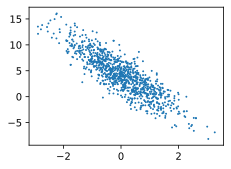

In [15]:
d2l.set_figsize()
# scatter 绘制散点图
# 第三个参数应该是size
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [40]:
# 随机抽取传入的样本(由features和labels指定）的小批量样本（由batch_size指定）
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    # 生产从0到999的数组
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序，利用random.shuffle(indices)打乱indices中元素的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [62]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2827,  0.5858],
        [-1.7023, -0.1009],
        [-1.8715, -1.0184],
        [ 0.0247,  0.7575],
        [ 1.5824,  0.2313],
        [-1.6816, -0.7868],
        [ 0.5874, -0.1105],
        [ 1.6443,  0.3430],
        [-1.1059,  0.6911],
        [ 0.3995, -0.6478]]) 
 tensor([[ 1.6464],
        [ 1.1283],
        [ 3.9268],
        [ 1.6640],
        [ 6.5746],
        [ 3.5325],
        [ 5.7480],
        [ 6.3173],
        [-0.3625],
        [ 7.2032]])


2. 初始化w和b

In [68]:
# 在初始化参数之后，我们的任务是更新这些参数，直到这些参数足够拟合我们的数据。 每次更新都需要计算损失函数关于模型参数的梯度，因此requires_grad=True
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [64]:
# 定义模型 即y = wx + b
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [65]:
# 定义损失函数为：1/2 的 预测值和样本值差的平方
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

下面定义优化算法
优化算法为：


In [66]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

1. 开始训练

In [79]:
# 设置超参数
lr = 0.03   # 设置学习率
num_epochs = 3 # 设置轮数
net = linreg # 神经网络的算法
loss = squared_loss #设置损失函数

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000045
epoch 2, loss 0.000045
epoch 3, loss 0.000045


In [81]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([0.0003, 0.0001], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0002], grad_fn=<RsubBackward1>)
